#### Required libraries:

In [1]:
import numpy as np
import pandas as pd
from numba import jit
import joblib
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Any, NewType

Some first code and profiling

In [2]:
from utils.profiler import time_this, timed_report
from utils.profiler import ExponentialRange

`time_this` is a decorator. "A decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it"

In [14]:
lambda x: len(x)

<function __main__.<lambda>(x)>

In [3]:
@time_this(lambda x: len(x))
def fast_sum (values: List[float]) -> float:
    accum = 0
    for value in values:
        accum += value
    return accum

In [4]:
def random_numeric_list(n: int) -> List[np.float64]:
    return list(np.random.random(n))

fast_sum
    n   = 1 values
    t   = 0.023 ms
    n/t = 43.8596 values per ms

fast_sum
    n   = 3 values
    t   = 0.005 ms
    n/t = 625.0 values per ms

fast_sum
    n   = 5 values
    t   = 0.002 ms
    n/t = 2500.0 values per ms

fast_sum
    n   = 10 values
    t   = 0.003 ms
    n/t = 3333.3333 values per ms

fast_sum
    n   = 17 values
    t   = 0.004 ms
    n/t = 4722.2222 values per ms

fast_sum
    n   = 31 values
    t   = 0.007 ms
    n/t = 4246.5753 values per ms

fast_sum
    n   = 56 values
    t   = 0.009 ms
    n/t = 5957.4468 values per ms

fast_sum
    n   = 100 values
    t   = 0.014 ms
    n/t = 6944.4444 values per ms

fast_sum
    n   = 177 values
    t   = 0.026 ms
    n/t = 6914.0625 values per ms

fast_sum
    n   = 316 values
    t   = 0.045 ms
    n/t = 7037.8619 values per ms

fast_sum
    n   = 562 values
    t   = 0.073 ms
    n/t = 7646.2585 values per ms

fast_sum
    n   = 1000 values
    t   = 0.14 ms
    n/t = 7132.6676 values per ms

fast_sum
  

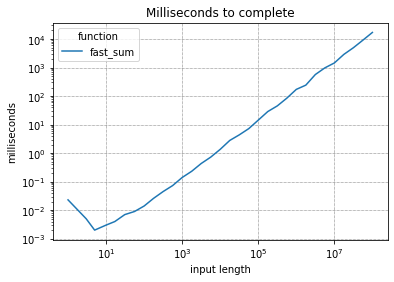

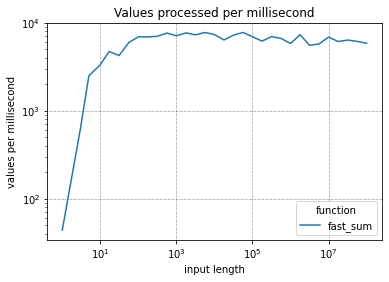

In [5]:
exp_range = ExponentialRange(0, 8, 1/4)
values = random_numeric_list(exp_range.max)

with timed_report():
    for i in exp_range.iterator():
        fast_sum(values[:i])


In [13]:
values

[0.7648875230396794,
 0.14780488420680948,
 0.7259707359253726,
 0.13104988049566757,
 0.417720897253259,
 0.017635968912321554,
 0.6378006588858449,
 0.9056037303701046,
 0.8503380117509777,
 0.7056058624785618,
 0.34312275146577786,
 0.39890683571783314,
 0.4525322055028699,
 0.2095163744442733,
 0.394849946947607,
 0.8777784639834771,
 0.7076732824198183,
 0.10491239360171456,
 0.3656243056322711,
 0.44346070895687517,
 0.265317618820623,
 0.5573434146873741,
 0.6968376515957987,
 0.8306666119200404,
 0.788114503195273,
 0.9239732990456854,
 0.5447588385653466,
 0.012481590973750234,
 0.9424472293940407,
 0.17239753632795796,
 0.5206471086847216,
 0.3519353879641641,
 0.705020796774942,
 0.17022282944627898,
 0.9136556351509051,
 0.20487241036954784,
 0.8395165231028806,
 0.1388192979075027,
 0.050847638364849845,
 0.038647272343137695,
 0.1172507864919421,
 0.12291543780627501,
 0.8902518226726371,
 0.26018787170990654,
 0.9523197218628724,
 0.13078909398564376,
 0.7313101289570917